In [80]:
from pandas import DataFrame
from pandas.io.data import DataReader
from datetime import datetime 

# Import data and calculate daily returns
csv = DataFrame.from_csv('dow_jones.csv')
s_returns = csv['dji'].pct_change().dropna()
bonds = DataFrame.from_csv('treasury_bonds.csv')
b_returns = bonds['DGS10'].dropna()/(100 * 252)

# Force returns to same length for incomplete data
m = min(len(s_returns), len(b_returns))
s_returns = s_returns[:m]
b_returns = b_returns[:m]

In [81]:
# Part (a)
print "Stocks mean:%s, sigma:%s" % (s_returns.mean(), s_returns.std())
print "Bonds mean:%s, sigma:%s" % (b_returns.mean(), b_returns.std())

Stocks mean:0.000302874417176, sigma:0.00929163175004
Bonds mean:0.000262194364986, sigma:0.000108690252118


In [82]:
# Part (b)
def simulate(returns):
    values = [1.0]
    for i, ret in enumerate(returns):
        values.append(values[-1]*(1+ret))
  
    return values

s_vals = simulate(s_returns)
b_vals = simulate(b_returns)
print "Final values:\tstock index:%0.2f\tbond index:%0.2f" % (s_vals[-1], b_vals[-1])

Final values:	stock index:27.18	bond index:28.18


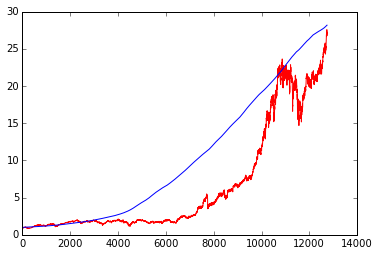

In [71]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = xrange(len(s_vals))
ax.plot(x, s_vals, color="red")
ax.plot(x, b_vals, color="blue")     

In [87]:
# Part (c)
perfect_returns = []
for i in xrange(len(b_returns)):
    perfect_returns.append(max(s_returns[i], b_returns[i]))

vals = simulate(perfect_returns)
print(vals[-1])

2.91120460155e+19


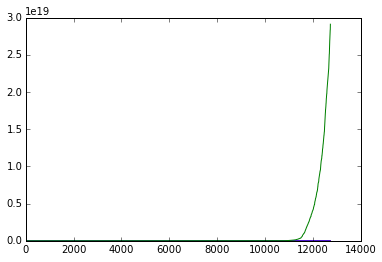

In [78]:
fig, ax = plt.subplots()

x = xrange(len(s_vals))
ax.plot(x, s_vals, color="red")
ax.plot(x, b_vals, color="blue") 
ax.plot(x, vals, color="green")  

\$1 becomes $\$2.9*10^{19}$, or $29$ quintillion dollars, with the ideal allocation of money (and assuming that there is no penalty for switching your money between indexes). 

This is obviously a massive improvement on keeping your money in one index or the other, but this situation is unrealistic.